<a href="https://colab.research.google.com/github/naren-7117/Deh-3d/blob/main/GPX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALYSING GPX DATA  AND CREATING 3D ANALYSIS 

In [61]:
pip install gpxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import pandas as pad
import numpy as np
import gpxpy
import gpxpy as gpx
import csv 
import json
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [63]:
#exporting the gpx_file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
!ls /content/drive

MyDrive


In [65]:
#importing the gpx file from drive data obtained from relive and qgis 
gpx_file = open('/content/drive/MyDrive/data/short.gpx','r')
gpx = gpxpy.parse(gpx_file)



In [66]:
#Parse GPX file 
#Extraction of latitudes, longitudes, elevations and timestamps from GPX file and creating the dataframe

def parse_gpx(gps_input_file):
  lats = []
  lons = []
  elevations = []
  timestamps = []
  for track in gpx.tracks:
    for segment in track.segments:
      for point in segment.points:
        lats.append(point.latitude)
        lons.append(point.longitude)
        elevations.append(point.elevation)
        timestamps.append(point.time)
  output = pad.DataFrame()
  output['latitude'] = lats 
  output['longitude'] = lons
  output['elevation'] = elevations
  output['starttime'] = timestamps
  output['stoptime'] = output['starttime'].shift(-1).fillna(method='ffill')
  output['duration'] = (output['stoptime']-output['starttime']) / np.timedelta64(1,'s').astype('int64')
  return output 



In [67]:
#results of dataframe creation 
df = parse_gpx(gpx)
df.head()

,latitude,longitude,elevation,starttime,stoptime,duration
0,30.416675,78.091155,1329.8,2022-11-12 04:12:05+00:00,2022-11-12 04:12:12+00:00,0 days 00:00:07
1,30.416725,78.091167,1331.0,2022-11-12 04:12:12+00:00,2022-11-12 04:12:55+00:00,0 days 00:00:43
2,30.416768,78.091095,1341.3,2022-11-12 04:12:55+00:00,2022-11-12 04:13:00+00:00,0 days 00:00:05
3,30.416815,78.091082,1338.1,2022-11-12 04:13:00+00:00,2022-11-12 04:13:09+00:00,0 days 00:00:09
4,30.416825,78.091027,1335.4,2022-11-12 04:13:09+00:00,2022-11-12 04:13:17+00:00,0 days 00:00:08


# Understanding the routes from the data points 

In [68]:
gpx.tracks[0].segments[0].points[:10]

[GPXTrackPoint(30.416675, 78.091155, elevation=1329.8, time=datetime.datetime(2022, 11, 12, 4, 12, 5, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(30.416725, 78.091167, elevation=1331.0, time=datetime.datetime(2022, 11, 12, 4, 12, 12, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(30.416768, 78.091095, elevation=1341.3, time=datetime.datetime(2022, 11, 12, 4, 12, 55, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(30.416815, 78.091082, elevation=1338.1, time=datetime.datetime(2022, 11, 12, 4, 13, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(30.416825, 78.091027, elevation=1335.4, time=datetime.datetime(2022, 11, 12, 4, 13, 9, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(30.41682, 78.09097, elevation=1334.2, time=datetime.datetime(2022, 11, 12, 4, 13, 17, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(30.416833, 78.090913, elevation=1333.3, time=datetime.datetime(2022, 11, 12, 4, 13, 23, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(30.416895, 78.090812, elevation=1337.3, time=datetime.datetime(2022, 11, 12, 4, 13, 35, tzinfo=SimpleTZ(

In [69]:
gpx.tracks[0].segments[0]

GPXTrackSegment(points=[...])

In [70]:
gpx.tracks[0]

GPXTrack(segments=[GPXTrackSegment(points=[...])])

In [71]:
gpx

GPX(tracks=[GPXTrack(segments=[GPXTrackSegment(points=[...])])])

In [72]:
#understanding the no of track points 

gpx.get_track_points_no()

1264

In [73]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })

In [74]:
route_info[:3]

[{'latitude': 30.416675, 'longitude': 78.091155, 'elevation': 1329.8},
 {'latitude': 30.416725, 'longitude': 78.091167, 'elevation': 1331.0},
 {'latitude': 30.416768, 'longitude': 78.091095, 'elevation': 1341.3}]

**CZML**

In [75]:
#DESCRIBING THE ARRAY FOR THREE DIMENSIONAL POSTION OVER THE TIME 

In [76]:
def create_czml_path(df_input, relative_elevation = False):
    results = []
    
    timestep = 0
    
    for i in df_input.index:
        results.append(timestep)
        results.append(df_input.longitude.loc[i])
        results.append(df_input.latitude.loc[i])
        
        if relative_elevation == True:
            results.append(30) # for use with point = {"heightReference" : "RELATIVE_TO_GROUND"}
        else:
            results.append(df_input.elevation.loc[i])
        
        duration = df_input.duration.loc[(i)]
        timestep += duration.total_seconds()
        
    return results

In [77]:
create_czml_path(df)[:12]



[0,
 78.091155,
 30.416675,
 1329.8,
 7.0,
 78.091167,
 30.416725,
 1331.0,
 50.0,
 78.091095,
 30.416768,
 1341.3]

In [88]:
def point_with_trailing_path(df_input, time_multiplier = 1000):
    
    # Store output in array
    czml_output = []

    # Define global variables
    global_id = "document"
    global_name = "Visualizing GPX Data from relive"
    global_version = "1.0"
    global_author = "n"
    global_starttime = str(min(df_input['starttime'])).replace(" ", "T").replace(".000", "Z")
    global_stoptime = str(max(df_input['stoptime'])).replace(" ", "T").replace(".000", "Z")
    global_availability = global_starttime + "/" + global_stoptime    
    
    # Create packet with global variables
    global_element = {
        "id" : global_id,
        "name" : global_name,
        "version" : global_version,
        "author": global_author,
        "clock": {
            "interval": global_availability,
            "currentTime": global_starttime,
            "multiplier": time_multiplier
        }
    }
    
    # Append global packet to output
    czml_output.append(global_element)
    
    # Define path variables
    path_id = "path"
    path_starttime = str(min(df_input['starttime'])).replace(" ", "T").replace(".000", "Z")
    path_stoptime = str(max(df_input['starttime'])).replace(" ", "T").replace(".000", "Z")
    path_availability = path_starttime + "/" + path_stoptime
    
    # Create path object
    path_object = {
            "id": path_id,

            "availability": path_availability,

            "position": {
                "epoch": path_starttime,
                "cartographicDegrees": create_czml_path(df, relative_elevation=False)
            },

            "path" : {
                "material" : {
                    "polylineOutline" : {
                        "color" : {
                            "rgba" : [255,255,255, 200]
                        },
                        "outlineColor" : {
                            "rgba" : [0,173,253, 200]
                        },
                        "outlineWidth" : 5
                    }
                },
                "width" : 6,
                "leadTime" : 0,
                "trailTime" : 100000,
                "resolution" : 5
            }
        }

    # Append path element to output
    czml_output.append(path_object)
        
    # Define point variable
    point_id = "Point"
    point_starttime = str(min(df_input['starttime'])).replace(" ", "T").replace(".000", "Z")
    point_stoptime = str(max(df_input['starttime'])).replace(" ", "T").replace(".000", "Z")
    point_availability = point_starttime + "/" + point_stoptime
    
    point_object = {
            "id": point_id,

            "availability": point_availability,

            "position": {
                "epoch": point_starttime,
                "cartographicDegrees": create_czml_path(df, relative_elevation=True)
            },

            "point": {
                "color": {
                    "rgba": [255, 255, 255, 255]
                },
                "outlineColor": {
                    "rgba": [0,173,253, 255]
                },
                "outlineWidth":6,
                "pixelSize":8,
                "heightReference" : "RELATIVE_TO_GROUND"
            }   
        }

    czml_output.append(point_object)
    
    return czml_output
    czml_output = point_with_trailing_path(df)
with open('ut.czml', 'w') as outfile:
    json.dump(czml_output, outfile)

In [90]:
with open('/content/drive/MyDrive/data/ut.czml', 'w') as outfile:
    json.dump(czml_output, outfile)

***Analysis of Lat, Long and elevation ***

In [80]:
import time
import math
import os
from glob import glob
from xml.etree import ElementTree as ET
from xml.dom import minidom

In [81]:
CollegiatePeaks =open('/content/drive/MyDrive/data/ut.gpx','r')
data=CollegiatePeaks
xmldoc = minidom.parse(data)
track = xmldoc.getElementsByTagName('trkpt')
elevation=xmldoc.getElementsByTagName('ele')
datetime=xmldoc.getElementsByTagName('time')
n_track=len(track)
#PARSE GPX FILE
lon_list=[]
lat_list=[]
h_list=[]
time_list=[]
for s in range(n_track):
    lon,lat=track[s].attributes['lon'].value,track[s].attributes['lat'].value
    elev=elevation[s].firstChild.nodeValue
    lon_list.append(float(lon))
    lat_list.append(float(lat))
    h_list.append(float(elev)*3.28084) # convert meters to feet
    # PARSING TIME ELEMENT
    dt=datetime[s].firstChild.nodeValue
    time_split=dt.split('T')
    hms_split=time_split[1].split(':')
    time_hour=int(hms_split[0])
    time_minute=int(hms_split[1])
    time_second=float(hms_split[2].split('Z')[0])
    total_second=time_hour*3600+time_minute*60+time_second
    time_list.append(total_second)
#DEFINE HELPER FUNCTIONS
def geo2cart(lon,lat,h):
    a=6378137 #WGS 84 Major axis
    b=6356752.3142 #WGS 84 Minor axis
    e2=1-(b**2/a**2)
    N=float(a/math.sqrt(1-e2*(math.sin(math.radians(abs(lat)))**2)))
    X=(N+h)*math.cos(math.radians(lat))*math.cos(math.radians(lon))
    Y=(N+h)*math.cos(math.radians(lat))*math.sin(math.radians(lon))
    return X,Y
def distance(x1,y1,x2,y2):
    d=math.sqrt((x1-x2)**2+(y1-y2)**2)
    d=d/1609.34 # convert meters to miles
    return d
    

In [82]:
print(elevation)

[<DOM Element: ele at 0x7fd7262d2560>, <DOM Element: ele at 0x7fd7262d2950>, <DOM Element: ele at 0x7fd7262d3eb0>, <DOM Element: ele at 0x7fd7262d32e0>, <DOM Element: ele at 0x7fd7262d11b0>, <DOM Element: ele at 0x7fd7262d23b0>, <DOM Element: ele at 0x7fd7262d2cb0>, <DOM Element: ele at 0x7fd7262d2a70>, <DOM Element: ele at 0x7fd7262d1240>, <DOM Element: ele at 0x7fd7262d0310>, <DOM Element: ele at 0x7fd7262d1f30>, <DOM Element: ele at 0x7fd72629f370>, <DOM Element: ele at 0x7fd72629fe20>, <DOM Element: ele at 0x7fd72629feb0>, <DOM Element: ele at 0x7fd72629f910>, <DOM Element: ele at 0x7fd72629f5b0>, <DOM Element: ele at 0x7fd72629f1c0>, <DOM Element: ele at 0x7fd72629eef0>, <DOM Element: ele at 0x7fd72629ed40>, <DOM Element: ele at 0x7fd72629eb90>, <DOM Element: ele at 0x7fd72629e9e0>, <DOM Element: ele at 0x7fd72629e830>, <DOM Element: ele at 0x7fd72629e680>, <DOM Element: ele at 0x7fd72629e4d0>, <DOM Element: ele at 0x7fd72629e320>, <DOM Element: ele at 0x7fd72629e170>, <DOM Elemen

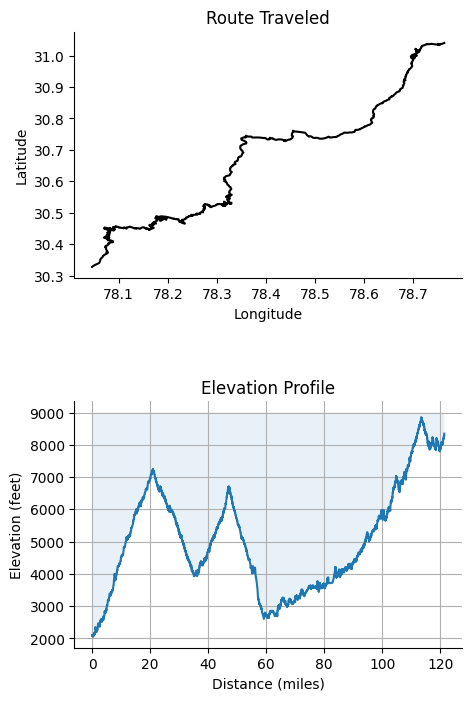

In [83]:
d_list=[0.0]
l=0
for k in range(n_track-1):
    if k<(n_track-1):
        l=k+1
    else:
        l=k
    XY0=geo2cart(lon_list[k],lat_list[k],h_list[k])
    XY1=geo2cart(lon_list[l],lat_list[l],h_list[l])   
    #DISTANCE
    d=distance(XY0[0],XY0[1],XY1[0],XY1[1])
    sum_d=d+d_list[-1]
    d_list.append(sum_d)
#PLOT TRACK
f,(track,elevation)=plt.subplots(2,1)
f.set_figheight(8)
f.set_figwidth(5)
plt.subplots_adjust(hspace=0.5)
track.plot(lon_list,lat_list,'k')
track.set_ylabel("Latitude")
track.set_xlabel("Longitude")
track.set_title("Route Traveled")
#PLOT ELEVATION PROFILE
base_reg=9000
elevation.plot(d_list,h_list)
elevation.fill_between(d_list,h_list,base_reg,alpha=0.1)
elevation.set_title("Elevation Profile")
elevation.set_xlabel("Distance (miles)")
elevation.set_ylabel("Elevation (feet)")
elevation.grid()

In [98]:
url = 'https://sandcastle.cesium.com/#c=rL1dE6Y3dS34V7p8NVUHHH1/eCoXKUgxUBAS8AkhcepUYzq4g+n2abdJIMV/H0lbWmup+8nMXAwX2O53taRna2trf+uLN3/1Vy9+9O7lm/cvfvDq29ff/eEnv3zx8ssvX3377Yv3b1/86e137168fvvmxctvv331/tsv3hjm0x+/ffPpb1/928vvvn7/Nwv8+dvfv3rz4q9ffPHJqz/95Kvf/OjL1z9//ZMf/88//9j/3esff/vjN7/IX/7gx+XHv//mn/7xBz/pnw7Q//7tj34/QD/+j1//+cv4s3//yVc//6X7z5//6mf/+dPP/+FPP//V377/9b//Tf71L10ef+b++Ue//tPfff7br3727//w+qc/+Mk3/zwG+9nnPws/++HAj//+9T/9w+uf//vfhp//8Mfh7/78D//xsx/+tn8a/D/H3//m3376f/3py1+9+fyb/ovXP/3l3//sN7//9p+/ffPP7Q+/Dr/8/u///k+vfvEPv2xffPJ/fjEI8ceX7158+ec/fP3XL/7lv7745PVvv/jks/FFv3375Xd/ePXm/ReffG/815uXf3hlf/6Pr7/97uXXr//8+s3vXvzo7//pxQ9fvn/54t/evf3Di1++f/fyjy8N/8dX774dFLS/4j919qcvv3v/1dt39oe/ev311y9+9Orluz/Zb19+/fbL38+f5hrevH/17o8vvzZkcCF83/vv+/C5S5/58JnL/8O5z5z7K/2lfRb9ZzF86px3zhlgj/zdu3fjQz5/fT7hvx3Q8H8Y+/v6m69fv1ornaP95S/feyGk+ebl+6/2B/3x5euvX/7m9dev3//p/5/FfvP229fvN+XGlK++efvlV/+fVv3ly3fv3/7u3ctvvnr95Q9f/e7dq1ffzr/3L+57L2r71HXvc/7ei+g+Tb6UOv7Vx9A/bePXTwkp9UBqWJDo56/ZEeM6hqmlTUzyn8aByYJp4WCat3Hap/57L0oSTMBcbc+VP03j1wCM6wJZiPRpsN+A8BGQGBcmztV0rtg1z9V0m6kuTCGmYqaOYfr4p4uCCZir5/XlYwcnyHuCJkk2pm+InxBZc0lnsupi2KDxqw8kj8sdmBz2gtY/FVMiQPvDwqdl/DPJ1+d0VlR9Oquen5iqgAJB/SxprNJnWXf2WHeIde/HXHcRUCqBoLaJPbbVV1l4cgJaCx8rniM2GSliT8aaDJTXwruCfCaobtAgXXBkRxcKQZtl05wueOG14IGx05HipGXQnfP5oyWtrwpBZvNgyRpCkJGizOYyCB7SPkRzRbEDw9/jBszv4q613lP9gNZjOXOmXAhq7cOZ0qRiqE4wkfthPJLW9ocqA1WOE+oeaP61IiuqjiBj27GU+UfNE1QyZ7NzNECT+l2WlHv9YEnZpuPuD1CUb1v7kdcpSa4TlATUFymHqBrTjSNKUGxcU9uYOVAIgiHEOCQvfkxRli2stv51rahPkCw7eI5UzreNX1NKBFFcj+nCBg2apCykHPLpg2UvBkglEuNAyBjiXtEcpwiNXAKmRBI7Ve7tYDesOrYqNKIcHbwWAEpufX9ZnJQdP63VgoH6WvW4F8YCMo/jwMiymw201pJ5HlsTSbqXNLh6gDPPY2sZF9b4uLBBczrZt5ZJ7WgyedxDYYLk47InI60l1XXX5MQdaUmOSTZQnicgy8FtKfEoLXIPOvt5hQoBYs8fiORxGPsEyUCRR2nd3QOU1mxFCBApbX08654jVZkuJILseNd1l+Qq9PYQSovxBmZd/UU3LlAiu7KXPcYrgSzZqENUZxLAKFlCFxDPrUthg8avJfLbau+8At0hQJiahhdQgsrSW+ZIgxwCigQtzk3j7h+bUnnjDpDj9W70Hqdo/LOKEKwtU0+wk1uK6S0yneoJh72nMta6YChxnK8bNMauIgNrbqSADdQmdzdXBJOIaRyn6fcn3hOuxb3qMWkLTkCRG2dMOWYb/2xJ9iQWAbXNJgPUvRAp4iw5E6bjj8dsPQi1RZg6uwNqX4qbbgkFjjM1srnJtz0phtu/EHGSuhehkI+i29kwfpKxVyGR6KPdbva6dr/LGVlMv5XNLZJM2WyyHuep2Oa6D8kEdR6kwWDtA9V2rGXe4MNiEJQowP4cpbxQpHYRlmyeh9I7ObmlOa4qbsm15pNLcFgOXNU+ukufmPq8oCAEhsp9PrAtfZqMUkrjITD9ZdBqyoxx3gXVuXsHtIZKTUCFXHCovqiQk4ConWyl2vbGuyIUzSKbzlBugcgvJfUPTt34vrXy2gXkRaQsldtviramQ5GiS4SltFjPe93nlMig5YintlAyY6RauekwdKq4TBShQ5RTbPpHyxsl66JJ4PrGzC/0yg0hUCE28TvYfJlENBzGBVxEI7bDZdzgaRAOFCcMWJXZTuSZ3KgWtgOa/wxOJhR9NtpBbet8+WG3EFVFMTBWHqi07DCZsFZqNBszyRCEsXKljZVMD2220aEEQYlu1JTsqovnSvMh27U3SDrHDK0Iiqy8Ltm2FAgfus5He20pSvi+6K75AOqHVEtECI8OQxPTLWt6/Ro2FwKVGwi6Tfpxm01uSFGWlUmGZupIN+NP1d+cqNk2M4C6yRnVf3Mk4ZvdEN0IkeQc5iCrX/ffVNnXWMpZnhfg4gyfhha5/tmFaXzh4tcQLiz+y06HovJqi0/OJsxyDDN9BbWZwO198VYWXSk7KpRmvYzLf9I0K01lqF7rRq2hotABWn5zdirGfPOfqptmh7W3Lf96t7ULx6cOQdNcrTpW5fYM8mag1mWYnDe3ghgWiSP1w1LrA2VzUsVAy7weIJMNucuieMDasp4GaplMvohwSLVwrL2oZTT5IlZDorU3FKDFM27pVb6oCHEwQJo5BCZq/rOkqOzAsRZzOqNoye6BsTbGu0XPoqfeJw60TJkUjeq1JkV9sHJvBB2HUlYObh8rt7vJnFljehlKKdo2Kk2viCgO2Qutlp46Z1yoayxIh4GysZbZF8q1+AhQaJsOy12hB9p1Lmsp9BM1HR9VqUV1bSi6jZ8Yupex6K4xs2Qtazka+n8zVj3kmk4Ed30iCWFG1CTE8kekC8UTtvyam1ypiP2XQ+TZSZnbmGq8SJ8/OD3evARNTKlMttnH0K9bOjXRxrKcMTvSaZBpfmITT0Gmp3CgFiGCfWKTIz1ugvDBssLygY17T4gKzW4c6oUxp0MXLSTTD9AWdf30pMwP7HoOi5B06Q7Jbp7Uk16a/sNVmZtrSDNVCzzlQ1oT2tJ7Ua1AhIgdjLi00iE+gyorRC1axSVpshNLKNPwPKBgI4mVU5zLH/ByXAdxSCBREl0msYKixEXdis/hgy2M5jTwIrQKL83m0tZKpyPHq64cGg+PDxdKtVIZyuSDuXuzF54psfN2ylu2+eXwuVRqDlXiZof5hUHOYaE3b8iHozSUhRIFNyLa0YLd5WmZc/PoCYrS1E5FWvpRVt9oiQgNNGPSocosUHNPynmLpsKnuFE6HyWNeccmau5O6GoOQLdrKbU94/J89axGA2Y0jXOiFrW60hSO9mUmLlBb/jFhQPJMXhGGZB6r6C/LCQMVc6Gkbk404feCyMaYea0pBxtKd5Cm2pA+a6hsVIhRTSdYA22d7aFXGBVi0qXz7NSl0UzvWF2+PeF3qrjNPABDHC8vmTq4Cz2O3ZlJNzT8NaNyaYHDabuSxplZi+9qjeLs9GVgpWzcl9TsE9A+98OwWj5HdxnSASi7D/OKt+Wk21PA733frUPs9YUqzyhj+NxsXUFnhMI5FKW2Vz85K0XdxUzUAeUFukiKxSc7+GeoywuQAKqHpG6BdO0Q3T2bilHMi6tGw+AtTJiXE2+iykIJb9GY6cUrSK6BkitBppCVYCQVNXigMGH1wjNJRUjGjdLr5r9oZBC1TY5Yby5s1Nod5T/GRXpLdfPypEN2Ohauw94WA1Zjh6yeI/i8e18xv2QuuKzO+jEfRjIfTaom//J18DcrB2f+3DnfWlTQwxqJsju6NluVMhYcmsF5G6vZCcvKWXDqD9T6QHPADkMmPNA9OItqprbXnurHTqEBMpWtmSAdE+qqgIp7KHO056JrD0TtsZZnZWytCvjDMwNVTaNphrqugeM7CoOkYes9daEuAUiUMXy3MEm5PEwN68re7F4L3RQVNYnksougm7ZSVMNICYu3s9OXjjhAQlL4kgfIrvJu2lFRDxNHMgk/QWmB9B4Axu5VcxUMrTA+3PbDKPJnuvV5UVUVztfyGWstXb2N0YP9zL2ZzO8yNFqhQuDmtCWVhyG4aFVvFeqAetqkWpiqbraMtXdT4LtFnpoeVd8zUXtRk1RN3AnFn6si+K1mbb5qqkj6I7gHqhzuWxMqGWDuDHPQU+nOTUUkeM/v/TPWa1W12yNGB8h2sK3UlNxUfxJU8Irq7tKBsShzIw57Yu1gFycANeXg4+YGv9bV9dTDFxLmXSkkVY//+A+s67iLJkG7OnmdJ2bv4PJI5q4H1UHM+BLihRIe9VxViYeTZ2DscvlzwlI2x6SJUUcwOWa7/PdBHTekcihB4Ku+QF2ZHYuyUPQcKk9UVD0ZEtLX1HRCvcYjh+obM5OHXFY1GQNtjbtnG0h1OllUy2HTcy1KRW3AZeItpDFRbaHKI61ak70ZDK7HizvYN19lI5aKbe8BMtN+D+WdiA9HWvUtH1dMo6jHPyMqP1B2T/SVbzPmEHO14+4NbjNpM1RQt3khqgodvGxhbh4Yu597s7VfTnMcr7AcTT6bn7h4dYhzOr80zalTrA9Ufzi5IVjeyTBmFzt4PYPHlTAw8YBm1PmKHcCXEIK3VXnjUd8vZz6XZVJ7uYFLUA9vhWwPllU1LN7Ff0HdIIVkMLflIMwiQ7ic642odT3PPICyouFJv5B0WEb0MOIWSs20XKE+BcutyeZUKWqo0RFi6QdTS5vMEIPO14hJZ3fWfKKI5QJ1IMQehfBRHS9F5ut5UyuvUL66lsoBpf2BttFR/YMpccJlU2S7BIraVhkm30Ctgz8GX8cwiZqSeSjS8iVHkzNJvTOZPJNspLDMoZKUWNTWwrJJB2p9flFzKFPjCdkIH1bwqqg9lCNZK5u5GlaYaIYABdWAWvbMmnGtXm7oHKHTBTO2d2bMMFBl9ZGrL7aJZyzdnliAqrHp6jWKF8mAtR5KLFTVuA1ALbQNygukiyfpN02XwlY0J2esgUP1to/FHCpfztQAlMnSuYtxoWRCf0Ite3OWOTQMBPUWc3N6PiufZydX9dOf6HCIy3G3SLXGaurqPn6Xgcp7wkmp3J+cxQO0qbD0tYHSqJQHyrykZ1lF43M4hdE3oadGR3S+sLfGZGTxD176EIFZs12O9YDpYsiKEkdCRirQQJWzqrkzRdKzsoPyHpNT3tNkoOygvC89YxF0fWDSwAcU7phMFm2CqoavqGVrLraacrTowXEkVu4btL6wPK+q2LmJzoaquiyMVOzYjP/oC9QeohDjkjOSWixguomU8Fh7XU6JbHnTpXSNN0FrHfbl+sJo/F56fwiKhmh61kx2m6Kh6q0THD6xLSVkWthzE6uK20CG6HaTm/9zoDRYC3VzCMKwUXP1VdnGgxLJ7XUtY7XUeH1jBGp5uicqLVR5olfyxlyW0V7qxTc4rcmy6GZodc148Y3nWAZa3otSJSU39cKh0h5p0UF014RUswEykXVWVZpGWCNReVNrcoQmkqWG/Ulb0zprlxhXQhbDHKtt1Dz6TfY6lc4Z617WnLCJJpngJg3JkhfnUPOQNSF8olqQLA08W1ygaDrZMLwwVqhNWLCJUy9lLh78kBZIloXUgwEqh7fWhHKFpQSRlCyHNVum89DTZMJEUJSRulhOiZd02mqBLXmgZFWRS892qrORQa3MFLmH2a7yvDwhReOUKULxMeou1EwZdGJaJDJ8yRfIKygT1SsnHChZVuBO172s5fOqTvSjFMjM1VwhljtcnRzXRJGU7ORnqwhx4vMfJ4YgOxem2g2BJKeHl09aCdB+ps2uCZOcC9hhMwK4h1oTKtM4XPl5X+YHpUyDDIyB2nRYKXYDJROi6GWgTOiaR3zWbwAVOwyC7G1/tsNIM8Jihwjce2jVPF4SP6lK5oCB5qI0fC8gW9GSWFVzwQYkAmNftz2aXlxsqOoIpncO0E6zFddScrD68hYgZcXmBkp3BnycU846oTgBBi+ABPt8lZXaXb04XBPvsJxtxkMqlaTQEHPOZ2fWsmrWM4FPzL3K/nlx0qcA+Z6LKSJlhbhqUEIEckw147As11/V9LNxVEGIagqnhQXGbSifiLU3d0Za84n+PkQD5rM43wyDLVRRAQK/Ud769NZlgqgYJogXqqzg8HRdxwXqKhoiQHbr1D1h1w/EkdgCq67g3LjHdXPADmVfc3UpGDO972ELS9hDGdmjXjp0gFqIe2UsWZ63yg+u3VSVutyDNWaVV1CDS/QbtJYu6QTJNYLsDNalz1SNPiZ6/sq2o2vZqEt8AJXswqxLd61RvA5DMGBzLFaWLSW6RtnC2GG5WyBoofpC6cEHww87yFDBxuoqZsDKFrgdKJspufo4Y9ljLcO2Jn+tC/TaMV3LuKxJtMSI0qeBMvnQLH8+hSfxNxQdG2p5vapa5YkqW9nGaFvB06pWeaJbuTQjqmXWVrXKExX0sq8dcxjXdPENt9H8fxOVF0pmRLHZQNl1aC7qqhFI0w0XqtrR787oUJWbYbpXZ5LZfOJV7W1TIA210uHXshYhNBOP0rSaFdmTgboefcwXbOV2kWevkga7UyNGmr/moGoWrvt5rPZYhhJaZVw9NZqoMa9kzXo/IXg6HRht5QXadaEVPKk4UHTr8H0ZRgOlGi4ObDX97yxLsySRyzuHMkIsY7pmiQCliuui7hvRHN41i+MrNShtQC0zsmYVzA3SrVowfbvHapZTzeTGgTLf3vh1oTSdsnOnk1lPzXSo4i57GoTIdo01UyYvt4IjB27ttUUrnLncCrCC64qZL2mTFkptUtg8Y70HNelVwmWTcl12ke0ruqhLjhd6LTqhGlmZt10tdvs028YqugF9WtViKRM05daVdomi1lD3pd/sIqtN3DkJhlHdGSv7C2uPH2f1jeW5s/awQLL2xA+0VOQjwNuVuU1iNTs/Frme+dKa+4dP7OHQYS5eC4noxq29Hik/SaqFRAN0SNqcHf5m134T+Z2RXjFQ+ybbBFcrHzUBoXnz3FlAvaqxyWW1bU63ZCBNzaSBaBL3HC018RMYvoW9OSZMW742OgKFS9hQsqgIv10Ly4FUu9GqKI8WYuq+9A1UnhyTbXsTa7f51O/K6aziYS5qbaBGLXAfti1ommmcremiICWb5RTMa3pxTOtPx2snoJ3sha7BlAD/86BI3uJo7k3XLGOewmbOtn3ja1mZ+IxbiUd7WCVzKhsiP7HUI43WWMpXETpgq0FPdFenI53nrYIQk/BdGSuR8s0duZwXSs895PJOGNhiuWc99lzW1tC3VtPVl31KTIO1PJjEWpiSHjJ+gxX3rqXPQ9g1AHcwptAM/dsG0giWYNJRQhZIxVXB1hyU1ZBUDW7nAn2mW41Wtkyb5lRecaTO3RsQTRyGeOx+S5g9kAqr2gHCbHWBqpYT4ft8OyLNT5QmfzfwZw9btC9GGCg5p5gvgFnWopTxOmywHv3ZvbJQ5aFeaqDKUQjyQml8GFZftyCXqZrNabFNx2HuyS44C8s3rbHL1C16Ni2/b7qrT7xBi+zbkLZsnIGSZTXuzjakLT+hqVMFpa2hbz+VacBNfSoSiu2WKjpRayi9nSvH2n4qyzZqWrGXK/ew9qNtrk/UwA0Vtr6+Y2mIayyVfRWyr+8zaOU9zV3RZtw43XIkp046Sa++Ht6WvZtnti+PcVNnTy7QQHrfi1+6X7uKNZCaH52VCM4J60Jp2PNY5QNVNmhVDIu9nRMxfWGMl6+cgsSBLCW9uJUkNFQGrT04+sdALaVhouZOexWi8exhdHbCiNIrAENZBLxY4U4LGpEOBVSw67lYlH9c6ar4ZYy1LpNiBSRDR9HbK2FVsW7QGqlesQ+QYaWw+5kv1xZKln56kMSdp1esMGSo/k+K7bjnjQo+2YRX3LBiVXYMi+WDDJRqDSdRNK6GMws0eSFeGn7HhCsXaKHSQl2lUBiqZB1KxS2MhQHqSvYoCn5CTsuYIMZ96cy1R7X5Otlv1UDO5MJ5cKLUx8xakgMyqncbSE37RojNFozXo4R/hvkFeraU91Br5WoVolg0WtX5Qi1S5ac6tTi7iuwZF63U71wqaLUuhIFajqp2OY4KlrXSByemLEx/iKAMkPFVCDafGpio7BmoxQtWstOiCMiUcAS924uyWzVKYU+CijJQ+aAW3aU+NcHKGailyEzUmlFdCfFo99Evd+8q05uE1wz4BHV7oDZJVwpD0wz4FMsBWbuYOVRZIPVLRAwVllY0h5r8kNQvgeTO6Fc59RqrL1RVP2kGqp1lrcWrXyKkA0omkUPdoMsFCjqsTffFElGals0yhDIUB9PXLLo9o1oPDqjoczxjrU9UNkUXrziDAjqjupUd9zrvXTSW17QQ+iTjzmwsFgRvmhbCMEOcDcj2jG2hNCDjQQnzEO5c4JbUE+JwD1iJNEBdgxEZE5rnHJ+oQTU4L+JOIyyWDNA0nT45kn6rymEFWWetpRIVi7cEkmK1yFMWa/jjkCtYzGk6LdaM6rlEENyK3Geaw2T5y5uFcHoMm+etYKpd3izE+gbKeD6aMNX8dl7lIZ5K2Lww6vk74eEYrCVPidZGJEsZDWMRcdyehspGBQ2xwjqOOyA4E7rbQl3n9YByPKC19KYnn2vPe6hgQ6lvUxZ/uDTa4vsVPQ1A1YOahNdkGyXpKsRfn9gXSskVidrssAy1pn6xFHCLmQplJZBNvWLKDKaUzhY4kw7qFUuo/YthX1DJVAzNp08el12wLNaJWmuPOpYjajlCJgNOmpYr3gftIVqJ4ESVhbrCpxUoU1eSqQ9F5Ra6pg2UyRprCTfLRp6Oa9w3RjJzrVxhXdyccd8Y1hhtlho9zmiqj8XmZleSJykSz0DrA5VLKY5i3IsywVyaxiISQHtNe6f1diXIUg9Ksm4+WnygoL7XnRemPH5c3iyzEh1mg5pnVA+sbZ+tbhSFDbQsp7PN9Yq14IBF67EwWaUtVH2Iq8W4da3kbCzVyDypbgnZEzW/sWqIGH6qQVFTAZPZkFqEkQKU19jjYdK6UHqkoZfGm+GvlBzkuA9Uv6iq2hZSQ6JF9QbKFJZ6qVsQW7YNC7Vo3zRhpRG1KWEy90oCyhEo76OOpU5/dEuLpiXgiFVVygpBmxDGEh9kCnFCuwosg2n2/9LODhyrN7nGmiSwJ/Qmiikc4bZAKmoaxKSF4NdQeaE0ZapyqHJ6NaxlafSNNshMctTFawY7cvuiyWiuq6hDlSNVORm3ZxZUsLZxhwFbzQ95pTGFnkV6t7vdCT7wKAZmIDbNEoQ7daD2HprYaurZozKc9nVurTNb61cy8gFZ6uzhmdaf/OYDVTb7zWPR1bGXuDmrkx4EV1dbE5ms46zZ3ZpMRb8cxjkTlZsI76vBQCYvF6eL7+FqaAA61C1yJ6361diG/G4uhdQ36CkVfoD6aQIyZcjlLi6kaFuqVra7vKs/7vS8GpjlLZ6gyQxd5F9GKXJMdrqsQ+ZssKnTHVDewignW5R64wrE8jAtFl9lM5+6uuPg5o2WAbxQk2O0lRpbBQ2UWTN5c0PtT3uTreZhohY3qEOE+5zDHqvaPqtDBCWjMZtTdaLW6iUbJSNCMlD5zDhbvGnTtZyw0zmZqp9XOfzs66pjYca0x1oM0d1VhIBPXEFsX4rboPLEWvYdA2Ut9S4PNLIuB6qEjUoLVT8ulRkgY8ASrGOyxkWrA01L2qC8QFc9DdZuvaOm6rRWpR5oQdmxKMul2jVfLxdcOzuFqZQVThqo+rEbNGZj+GLtAJ0G3lBzPrQVI+juPug08HZKRgdoeYOLRTy6u+qT4KfJ1qRxTrjoqdKdx8JKttZYC6UMj3q8gepnxrXP9fHwWJeOMWMzYqnoPkGEaEVps5+38ajGkFFdFcs2/KxVY3c9PHDfMEPjHmoxcr+cwQBhUXM+LVdTkH2fCYV+uagzVPOSsKiF0iNRPED1fF9coPbE7MXKlSfHLFR4qpqKVp29uC8tlLJoJGqFv+eMCxXVVQ8f0zhXVfjPR42S4OSUkg/TTJL6lB461Fno5jCD5kBm5HZH69derCNr1xRIRp0GyI6zaZld+7TkRjI0086ta+NA5YdY0UBZfkxd/u7utQKrc+nWTXWi8kL1J1R15h+r0ZhG1Qu0EYu7DWjZjTCDXvdYfLX4/iDHWlbQ254ept0Kt1jLyYGqD3W4cbfeLdZysgctkqZPq5pDzsLyPWgPAhCr7qNzQJK+WWhJ1+0mbN4+UDtSnI5dA2RKj+WX9FD8Q2lp3Kk9xaKQA6XFwSRWMkO6mUzWQENBc6mB6hdKm00EiJCaTXM1M7Rr+SKLbONO2inNjquWL5YI73K1FMFi0d9+dZlBjdlA2eGxyGeP/mrvgxmtIrnYevrVZyZyXRbxm6hJ1ahbLSjLoimt27p0rxO52RpqFMv+63c7GnLzPj8Wke1XO5oEy6J2c+ecGfPVS4co8ypYTkTX5NLCu6ea+/8MVcpDr5ZjczcT3+r9L4xJ7A6CoJa4XkvF/sxg+55wHkVNLS0Ugc1y4Yd2YMtSvmkQus3Ch+aa6EkZokERbisTerZ5XkNpIWehELQipSH11xeqo9qa6G6Q6VB9dUHr6qguDdpK2x57a3DRNW2sUFJuX5v1Y/CDKEW77maihB/87FMhsMQZt4RY/W2rFqnXxnV12x97xmHAtPEujsb2nFi210BdC4MR0lZSwJzS1qUNiFvhjLIur9rd+ENOaNew8cvsE5sfib/jEpbjOGB6NnQ0nA0bTQ+HsKFV+0xYMph2PU6kfzsien1CbAoLnHRfjtaH02uN7yAHYDOONHtS22AayymooY/NKhU3w3p/NQ5ioLBZBmax5L0JE+pSMTlfsHd9ddiRdsuA5SAXyIDph6KZVGzW+GjeIDZp105Y/ITiRbxO2NXkirCzowulvf5LIXHtcui7jXDWvsWFp67uweruI+y13RI4cnWxnqS1sbw2P+KMJqsJU8GfKaRW96Pp81y00HcBSiKnWcrj3PVsMJXpWFhfEYG6e5he/VeJ6qu8dKHWZubrfsBRsddk1vqrwfSyAcn6trOt8YP3Wvk87rcAmGlY1kXCrwIlabkB2La0e7PzefUu4i3erVpoCm2bVLkbO9CtYq9Y0x7vrxZHAZdXD/u6PFS7Gm9gC3q0G7qH02NaO2/A+ddjPDD7Aj0DjKx1K1KaXvN1jDXGU1DtGXuK5xowsl0NW6AX7MSpYg1G/EpAf9BNuxn5YLarPpvacLck6V1kO2GqDmPOvK/EvLtpa6pFO0ZiL5vZ9iEuV2obRORuYFZdN6qVK7eNW1XtA3Z72qtpbuYltXri+Oo3ba+c65o52Dp5Ptr5vFrr4rWlYU6mjbKFpatLBVGYcm1Ayf7J+u7Wib2mzWqlPKRZjcGWtK1tH6mirlrcA900s1p2J/Zy9/7AYFa+Ue0G80uGf+yfS87spFmabB/Q6kNu14AtJa6Gffto1Cfj5CVn/oMa3P4C9XLB35ectQgeJpNJoqJsW4jKhkq2BVXTg5CnkpwZQtUyvCbsqWP5gKXNtYa6OpMch3razdGmjMwGu5qyH5SFA3DJXqXkp1XNQG1htY9A1QbbaEA9YP2IvmawK/sRn5lNS8BoUc+wI2zLF8DaR2mgyZWtPzaj/1VyfhSwWVx6hjJaaCobntxJroazMCNG6g/d7gesBr1iq2YX432HZO+mzfdJ7HTWq0luIKzsDbDBNHMdfWaSs0aYk3HsC9TvUCoGM9520S68Wp4ygweqx81BRrTL0XaU7uRd2jLU1n+dzgRQVxGqb7TQC5/8qgekylefz6a3YndO2S9vImAhbVrYV15nTlD9Ujiugg0UKSVvvS5wVWhLuIxWl8mbV46j6V0BVW7WPdZ9P9nTC/7yHGO0lA+nLelyNQ2vEGl+K63nUmzXZQGG9NlvzXCj9AxzD6w2oFjbvgHTY4dXzpJ1fi99y+Smd0pPRO3reu/BVQXSZWUW9CKsqJcI5NgujWPTaGeC4ki1Eo41bFTThmaeH1pgNNto2i7Qy2ibuPvC0x4G7N58Higp5yGQVq43Pipg5uk6hlSr8eMeyA8odbg0mfPAbM6WHppD7i4TpbWDUl25kxpZbRANPBa0cJqwQK/FhD25SZI1w5vEWKTt2nANfpL5tGXTz9RqFXpKZP1L9HVto9sSKNvqUSCdwfrDwzyrde+WyrY0NVZktK1ZHQVSo5R0vKTd5m3sw/6CqG/4QJIGS8+E0qehShqfswtk27rVkmsaqyxQ1GZvw7o1NftSPS3nnZHZEi5uZWLtVL8se2gJweLgc7BmsKgwfKiNtS2CfjnHOjB5g4xkep4KvnELyKOyarv3gi6ds/tG3DAjrB4nhG9WR4mtJi/e7trOM+O+C5Z+OXVzm/TuCAzUUeDtI9vVTRbUL/5MadS/Dl3HyoptkrMXoPzVphLVgrPMOerFqKU8tD1nQfF1Y3c9djETFo7ZY4/16LmL4Iy61bR+UGpTFg7WDswbTPtQkmkbzOL1yI7W/ZQQ8aHneJorJLjrDaSM0frx8623eNzlQyY39pxFJofrUSwhx3axWpnUgOnpTBBWwZopb3/thGn7XK6sHd+8kSNd7NEIy9vRb3NqmCITtZ2LZh4FbZdS0IpxljpE8R+F+5ktGAQ76X6/4xS0AkiOcNz+C+u7PF9ySg8OmJnJ1rblZtRQe/0clWhhxXPuBkgd4dj0mDZ3e3t4112OLXxlhkhexPDq2JL1b2eauZMnTB2yOCqx+HNfG+zqzY6LOFozZIG1B5EQ63aslI0K4aH99/SaR7EIBqw+NKKeHrzjj1pvW/kr9tExWvdVVM2gJTxsDD39Ekd02KTaWRiaZuxdb6ig4VHrgbFgyUFCeoO1j5vALtNnb7t9gCpgPJ7Jb+eFOVEHrGgbWMLCtokXo/krCteJspX5tufUmIvn0qwh34QZNfQmwONOKW3hbc65oF1niqw/7oVtUP84SMqP3I+ZeX1ypUHHsXz1ZVbbujShC5azpcmuW9im7FeJJVDmaPX2FtZsMvvgokmWKAsXTbg6qqLNMGHm9pyNZh8Kx+ekbcMWZwT/lBM0rcUgV+yA6WhCWtMkXN2ThqeSW+zmfn5qtqTVNDgZTY2yMZjWFQdu1XbzHYJouoGiorixB6p9XDK2bBXxEYRwvUCVyI6WGbStqAHTzgqOMAusWinljOVo28OK7wz7HjhUu5IjPUbbeevnutCOQ8TYPdy2DNJH8VKv2IBdPtfiHqper5JhYbtGxiqDJ0zryzxIa61vivUxGDBNq8XLyWmnb50L6upyJCeq4LozYnRtzAEnQToGTdlLE5UpVR4WGBcLpW/2sVNfslqyZalsWH5oPzJg5dgg9gyiVkVR507NH+M5Geypam3Ayj2YVsCR03a+9bZ2w9WqiXKv5+OsL4ZSanTCepU4a9DofDpF3MneY4MdHq4yP1JjbzrWf3V/aUTlxvjvhJWPy+4Gaiuj+xqLV1NCaEL5eIa2sIraDxLJv8l6ZC6BsFgolqvjYAXseKNszqu0pgsqbE3fYHLzJDQ3IOxwmtZaBZA2pONeX0S7WigFGSycKEI1mLYOwt2ZrX637ofwQroS+5NQ7cCCwbRKAMczb1t3q8kpa1VW4WA+qsJxNVtCIGfwUD3ai41WrlZ5DbBYlbipaKcrWPWpb7ebvSEbUtXRePv0o1h1Q8lgjUKt50v/0nq3WKkA9BTFJgtJIlZDyPJ8ppNQsfZdi9liifecZb86GfRxmIhQyICVcwzsdVRtMJh5reyatx01DPo+TEwiOnYEr9iHakeoeN4Jo4ABSlp/IZMI0upMGXUsHKnUXJPoaNAm0/HUjU45etz1+xFY9zjl8bntI5XF1hpzyk1waLs2KmcdDcTYVTfb1zr7EwqKN8FO0Tr3v8ZtY4y8GDsTZCZKNiBQ696VRb3awdOn4mOQW9bli7bivoieo+1uW4BJZV70vBhjCTdM+NbxYjSHNyRultt4qPqEnS8w5pBDYOb3Ru1slH3asxiCoXNpAU6Cte9FLMHQqPaFrJdUkVs2NG6ovWMwrX8bTO7PIAqAtezcKV3zKWGFUTu0l0DhJCjiSwglC6zdsCIwCqJQz6SLi7SUL2SqwdYf6fhRg8ZkA1y3IK47g8kX0A2cdmmd9aQbMJHfIcq+x6rXdpErNKCjT0rIALOVibMvhCJzRslyCNqxOwQqfmdpW6xpHDh4zml1BydRY/YkJMwVKstZnWBFdNLgKCNP2NMWJocAT5CktA3x7aUpcgQ8A5W7OGveFzaWKKS+8aT47V/cik4RhdRXsUKqfmOVcJSvQVaWlf5Vip994WjBHTPEXsAW55wXu35XTPUzqRwVLybv7uFxjkoVVdNnMlpA/mM3GDnIow3EdEgd7799gtwYPiXyxvZWbldTlVQfn8T26RqmmR33BEZJipjPYrQqV4FPInDbdQa01NEnbnw+U9oHyBnwmVfBroo6cqiKVebFzt73z37LO2i01TOykgosEVuacLcvcucVJrMOlJRf+8Ibo/R6bYFybqXWUeFHbQYT9qgcrYWmLrUmmo5vNAZPhhpgMlqj7Ote092CRlIt1nNrRMV4sinrdrJH7xr2CfpYl6cemR2uM3sLXmKkvjdRXvM1qajfnmHN7MPxWBpM1G+RRPZCxSJINVh5hPE+s7WJCeSR+jT7i2iqZtByS9/hUtgNKc7Oayc83xNAOPDNULpVnDJBQ7SV1fAkJ3eLaSgeGtW0J6E2rLeLuBKH8YxT55yvnVIOR6pp2v2j92MLA9Z1aSDG0RAtByPoS2eeXoBsHQaq36Z2l8QbX7kyex4PzryunFtpATVfJS1rtjNTSQ9UCerz00CkR0LqEB7bmer3YKKeeDG2t2njtw7Qo14b5wYtzksgL/R0XRoRqKJOXq2ZFHlVvNMUtaBVkx4tJdMJqu17qis7opYzWdnFgtnKRK1GW91kLuZFWBvskqSdsBqvlTXddFzbxXQTWOQa70MbmFRivcjfVEJCO7R3lWUzu45FYqSdB2aWZdSiSN9I2tRPulgxWFEYiLYDvHY4o1ZF+gYBWfImrSnyA5afpLK937tgYcGCLg2XWbHIPicN7UkilHpC1H2hxC87UCBHrU12PWrkTWEt3iilBlwipd1jXUIU+nnZKYeWajBh+XEwC/btbDgftazRHqZbsGod4CbM9lPZtsMcrzsIENwmmvJthyuv7sBDcJtqqgHgkcQBMyYKbn+peDGCQ15T9ZuJzicI5wZ0455eybbDK3HBuo7WCTtM1AzVVY8/OzU0vbBhU9BEjeQFPDYwYODctGDi7Ago00rVaoNnhKUbTEfDYCeh4KBEAQh4WCfVM2MzkAwVEOOtOd3rFwEZPDcqn4jU2k6ttQto4zZJNudqO9MhagwjePKQFUNUcyhErX4LzELarbRr3ivT5niBMfu6Q7ymcEyPiqBk/esaCJszolz+gRlN1S7iag2wBqwqYaEcVqv6r/ag1IT1J7Oy2k1crd3ZgMm1HpAfVfcpDvsUR1FI7b06g1Wk+q6laclTQCr+1G7XnHEvTXuZhUhymHq77Q8/O2QIrBNmCbWEVTWzQTZ753k3ZBkwSbMLkQfKsg5OtnLUXmWBbrWhaof9CQZLOinusuby+VKbVF0A6MI4YOXAgsH0ROFLd7PouTajW9FjkDhpO2tLBtNz0DipCaKY9mjKug572kynnjAbTXxhHi+6DJg5Z+1GGbB26bcBMLuBoln4Uet4PGprU9vUjZu6qkR2giy6H8MeS+17NEhMzczeubIlSbPe2rwMdvHT2dAsPEn/xKl9ipaeMFDqxYAgbaZ4T9iimfb096iGSG0rYVhZ1PsHrmrL3FjUCAZrTzbSbuYMcmQVks4DZeqttQmbKHXWkBq1H9ra0rIOxi9oJtiwtKyXGZnDXpOeH7rkQr4YF2G6Zp1iq3Vym7Cmkhlr20pAMidd1OcEAh5ISt3FI3RtR6uOloEyWZT8pppomwFB6L5VgHRoq5c2HrwZMLtnMZg6Z1FjhNFi38TVWzt+OFjccl5LagLehEndb6JtFUDbsAW83zlgpuvEfVEVSerEW5PTBXBEx7qotFgmoFfMgFmOi7WtmzC5NJjw0HcELsb9BZcLFz6zvhMnj0zQcplA861vW+QIhaJW+6k1HYOZqhDL/s6svmr4wmbZ+N4CW5o6XTt5yPIAJmxxZBGOjFQptvKatkahbtKIbnIDBS1gbbt2SIseFnS3OtiTDxaLvlvjuVUWythutwHTl7aoE/WdEWbtjfzMrxJY4Wi7fGiLv6qj8TLoO1OnmGNqKAsayuhAmSTKe2ma6B0d992cHbNMY5FNzcbom8x5TugarWtcBA+6z3h721+wPlRNvehhnPW8xHwyL0ZSSy/isaIZzrOD3A9Mwkn0EHV7onY6NdeD3pqKGZi00a2txq5H8UltOGW2XamWzUU+q5OEdeGA69aThqPpqWLedbcWwxO23rzWtjTzhQfA7MRnY8qZZCWHj+KjmgIImBi1oZJuDZOmBdOjjDKL7LZOUeIeLT3FdvLumT1raoLBVMwcEZ6d+dyrPfs1XdQa2znCecCMK0vZo2UVlLK2VcRSzAOXNPvNenqeL1i8W90erKkK2xoHq3tpxWAa28n4Anu2u1rHIj8TClRXj/gC46NyJu2XgQCUGV52FQ/Sir4TIOoHzHIQ7JVBn7SsPYQImPUUmAbO2tHLWgoeVIubP8xNkTTjK8AozC7Fe1KNr+GRqexy2sSNhlIdpWJp2W6hGvbSVLl2oO32FFUTgPPtOlVzgerb2jOaaXTN8SurXS7VnLjzITLCgLHjaQwxMZe2dlC7hBso9eCSDs3Gqm2vvV5j4RO7kcusrqQv2nm0Hh6oPVjaVG2Xq/2szNsjFvMJIINdWvUR3nnXl1Uzk2Z/+wcNd6amtBumfvujw8xnntuec1EjXi4zzrkVhboPuqZxeYi07O19+2O6J+2eMv8yYHZhmF3sk+ZxeVT4AWYvFU2YukAT12bSpW3qard2T3oEExtEyWB4pAcf2tImmzrgUiXZ7JayF38mTON+nptgRuhO80uayjU1H8Asb6Zt2a0NWXwkPbbsbmGvTWoZPfqNziedw4YtOapeCn8agw/UpprfcyqDi9iwx5tq24JPu7IgWp13m/u5od1Q8gGeotseqpmDGXtIvr1HV9/5LvKB2QeIRuQdv3Nfs81t4oou7zpP8i4v3x04knpGZM7txT3yRR0jrotIMwlvLZ4mjPvuUPk+YU2FWhK1wyGKmHcRbrXmUxMmS6uJX+APLBuMW+UKb7y617ZvWc2nc3K1136d0SRpG46nar9JsLvC+qT5dC7zS60xed0B8BnbJUyudrvxdindDIwKKpJzs5TIJ20d7xKvgl2ruwtKZtyIMOQqDjEZz2mxrZI4C15Zn+/DHZQRTZQOF0v78Oi5/QFVB0tAlYOyKcUasUr2S0pa0f6ECeOiQ1b2u0jL+mj56XURWKQwNaPF3kSbsKIwCI+YjigyqnUdDaB2BFEzkJDWFxDN7uJmtvZUQQSVMJjlG4Ma2p7FeVLDSmLmTbtIq13rHbzy89nivCeNBoOImc89NcLC/gIbjVdL7ci+mjCjxj4rkug33ZAfwczCT9LIZcAo5q1N/OyNbF9KFaz2SibKdrfsZK4k3qQBg1Ltk2kLO5SexJtUe+Elauez74tKOrkMFLd9dzPYlURJOrkMOcD7fTvTe9ofWuRD5Xa0VKj5xrt9AXOcxl+Fguut6VHdAesk3qQBI7dZEnzdiQpJUgJrRxpi9pbIsh+WnzDZKzxmPCeN19p4qmoPwpV2qnZpeJKOLwPGTdhdVfpWeMTtNJ+HA912eARr6/IJXkaz+MhOMBww+QTl8az0KLSQa6PO6a1fa915iEkyB6v58c65ivdopEdDKDF7y/+ZsLXzhcHQAUs8yzaY+c1SCbK05rhVS6loO+8rFTlWDbHh7BcP+LazyFKRY9XkICz5O2DbCC100tbGC81bkuduZjBhVWC3+Jsrsw+gXldbJq9ZfeGQT3aSxdNVW6KUsWbgdSdRJHF11cb7DLB6YELbyA21NBYc5ZJlp5BVP9bmt/QwVJFth4cz+x1J3AULSZ4VmIMRZrfGbnyUipy9hkDQPHthw4y2Vb+A9Niurp3nNAT/RQ9yrumcfZteRc5eS3IMTIElrOpo2HdrJVZ3t6VU5Ow1vI6Y97svEG3yXkFtoi7UqAdZ3iu4PtTaC/Vt71U9epHXRrNgXDffZZJ+NHPfMZg94jb5e8OazglyWPL97sIxYEH2INH2Mt/8hK3TIjmGugfB0r7abiiSatTRTjbrgLVzkvdowkZoqb6LLtouek016YaCwYNlcLZdlJakPUxtyNrN+6GY+QW2tFwev+Ac5X5G06XBsrXIom+7mG+GW5/YY78WM2E2Wn0m20pyn5HraiilGtSKYH189jsDA3afA8KWy6aFM2d7XpoloMxOKDZp60/HZT8Z08JWdKWry4zjYrR1DGYyYDKUHCoSbRVbDdS2kpuyJL0ju16eMGVJD4VnP/A551xiQV7PHYYWBFtYz7gvcqzvlBcY6inEGqBupN1nShIMa6XlFddTTn6ue8O6wPCd0fJPxlr3yoTVKtoyDlivG+YNJqPRiRKtmcWErcPSGGSbTycHwJaS1XZeRpLXdgejyCdsxs2bHKI9NXrqosWaCVMJjsySbE/3TlQzlLCa5wk1m4pLqxd3cKeMiXauUGrK36ERli4U4wG1orRhMFE9hyUbrAosktf2Ad1eMemJMnaq80yd+33tVFcFhVZtsDeDm98CS1IMK/psDpRv+0TZlKqf0Psdtn4StwtFMgynshAp1iZqB25miOZJ8wiWcD45zAZLWefkYMtendGfDROZUOBRCpaX3rLbsKzfiR2wfL+2Q3FJcgyf5oyHaMpDhcfYMutbsN4GSd5dmEvDh1owcYqMxbddlQA6/4LZ0jMr2cjWVJXkVtkFFHcYqKsOQIUzmJU/B5sfmp1qf4VizYo9284ynFSU0SgkrZ6vbVf6FHOql0ILOBLLXMg5Rv0Cks0eJT5SPkuiymRJrs1k6W7ZkvO1V2Q2e/t8J5pv2ExB+H8C/utfvvfii0++efn+qy8++ezFf33xyR9evn/17vXLr/d/fvP26z99/frNq59/937+Y//pl2+/fvtu//u73/3m5fzXf1mZNfJ/bg/+1v7qD57+jltx3vk34sd/41evf2vLyn9Zf/wf57/L/K+vX7387eev/7CW5OYfvH/38vXX50+8m/+bf/zu1bdvv/7u/eu3bzDUWMHr387/+uKTv3/7+s37Lz6ZwJd/HH//5W9ef/36/Z/sx+BC+L733/fhc5c+8+Ezl/+Hc58591f6S/ss+s+m49nNSQ1gI37z9tvXZ+Ix56tv3n751f/LyPYXv3z57v3b3717+c1Xr7/84avfvXv16ttDrrmZ07zcx92fBinjl0/587nGpga8f6ad0ulwnX3t2/49y+9HUs8+zfvvU4eamRQYv53xeQd13FTz5/1rk1+PePGnk/N8I4K/I6l3puTv0am5d8Syfennr3sqPuP3gPF3UGQ2E/IEHIE0U+HPz7I+3BmzJmqvX96B6O40XJx1vef3qL8fGTWLjfcHSN+SATiyf6bonhUymW36BQjoZ4osa8TTMjOHu25AEQD0+Qk4U1RZJJwxE3AW2WSECDpXj6/oCjjX4QTsNUgXju7QZWnmmu41yDML870Z/H64OOhO+PzxEiRkOt++AaVD2HQKUWZA1tRMozy/Q7R3/rYZKUhKYe+pfkRDjWR2pLbI6NJpouNhjvn7GUBS+ZDuPJe/Kaj19x3dFGZK6f6+KBks9pT5AewZojxK2lHXJkvQRNKO/j4TsGmcxF/bkwD6JpMGPzo6lfjdyHP8LmG9LkQ4u5wkoN2FTfa/ToAsERHvCTgzSBC7UxzWUDeZkgTcOnzOskRJh0Nzjpl7dz5RQmz9PIA4U5zO71LX0/DA28wc2xupr7429FWdGXSQyPyEVgsG6EciSyZ4q7LEdgaQKrAmUgtLyJJe0PAY3/yITSRtT873e2a6FwDyEdmTEc4SJEjKRhyTGQEQMqVEdo/n2pGPjD1/JPayRERbJLvvO24ApNq2RUo1f6Sa1ps3uINntPmMIAHQYWXid7fXWHQjAqWeFeOO3yXLnoHFeTu0A+gC4HnaTT8HQErrau+8Plw9t68XQML13Q8vaM1r7ZGAw21VkkMqnpyYBWh7iiqCpyKladae4Q6XKfQOPTNIbkMtPPX7ieXxi8idisRGX88SmyTNVNSH+y0Ex+/6jYmyd5fzz/fonQAiN+IwU5MYZY1FAHuKLmkLNYLf3RFcXeK0VQSXO7K1K5l56N1Rk3rS37mNR80RCqCZwdRjzl+XiH4VPauf268LL9dTLT5LZPceaGFXxePXs8/QAeirHZ3b3KhrSfpeUWXONyDqQ1fSiTgAr0+DOK4Cc2gLOrSRnsvEHNp9DpGDqTJW6ITadLORYaEPOYlso8Pn3A0CtCFn4W5ijqtXIW9rKoauXA/xEIAhtNVb6h+dCq+lTyV5Odqg1tV2s5NaR3x4r3uGDmTz9GcguvbCax9/q/faVE9OV6GSfbUD5uk6v+uuhkDljuvM2te8iHaHdeorkp2TBK6iXU+a8eI/gODaw+Np8+6Htn89HiAXJ9hPS5MyUjZ9Ted37XFWqe+no2P5q72ZiIrEdVZtZk9VNyessz01xfe1nN+1Z3ilzbCVBaunVAQAsDr0mSU2MZ/R+ADL5uktzpnkANvnetmUn9pgeKg6lxO1tXYUc6/6XI4kaBMD6nq3lggHhHKG5wVSaaXpU4W+cKFnGVnbDHoqZVyolqdk2pq1Qbjp0zHZUWnqACi9ZIidCbgQXR8O3gArkDKAPnXpsM5GuZPz1eyuAcFJJNUl4f2p6TgiQtpecQQxWbWDHAbYZtsE9KemcNPle3akOG0IVzgGFqGFEInWRgvY9+stEAdFudGuLVeDQ8cxzo2lJQ1kDPldTyIyYXwLR9X2+mJ39unjVVZ9ysOBO5sHX1yd8b1SC9a1vmLohRZHBxu2lI6B09rCub1DuRYaAQiwYPWgoSzWn6DCRCg1qKY0DzNaG5dnmvENDpPY+38zRj0W2PVerXwsFPukRdQZ2Yi+ueOXStofKCO1yp+gzLTz4kXS/BGXp+uNAW49jknSzhlZzgGOWmr6OAW9P83hY7WPRM4tPCxDiQ5tZhy2Y4/qi6e0J5s/xt4sDlFZT3LB6tYu7HyRQ1fRr5c9PM9rglmsN6cc6MPEQ1zpuyUiNo7N6PQhCRo7AtD3tFA6Ivw3pIAoRC6TGAHWt7/eywwfbUnWimg+kjB55wBU90OQbEbDAxCqdckQ57zOtinaypiSnk6ASz3kEMdTMS7c671LOa9EaCNkeI9P/G8iVJmOlF4VrgbtNo9iXN/gSQhSrSEKZotHBR2I/PCWpm/0iEi8ZX4rECkRoW2keSdBq5oBT218jjFyhE8kaV9r/F7O7/7S6DFAgWPnejoU3uJWsMqoO0KzoRX4Ve63QKHFnjDZRGiP60wer+eGz7HoQ3xkLliTWZ2NhR6k7hyI0a5X+jIQGEKfMEMPlgHoxwHk3COAZzG5y1ALQDR6mXQM8GfHnZTVI3khwKBJn5BEUHLWP2MM7VSONva+c6HxIhcWmnAY02VRJgAqAbpOiMeePSbJF29gkgyHl6Y9FyrcvfgD0Ocm0DfWW63b9sppX3+YL71iiPvxCAxR6djT1315DPrOKV6I/tBHfr4lcb5E24SWjOuktw6AnqRjnvQeMYK/etVjBNjwOV+HcbNfcPC9jetWD1Ikgi5IZQw4psLJeF4IneSoygOBD1HGAD3n0w/4klQ/dhQMQMMc+mgJ8vBnVheGKP6hI39wkWPom4koVJ6PQYBcl4g9voRgb6NtxCV4iKBH9vI2NKwjn2DiQDx1+x+II2SL3r5IFAsOPK4vDxb4+gYA115RbwNHoATVJpjnrAZXcR8VfYsVt2Jw1DOKvsgZOUfDKSnXEwMerAM3VdY390ogwRukX73ViAPoR82o+goAXhkZAMQB9B2vgs4KAW7PrJ3iClqGBU81o6nChOKqgUAAuemnQh0fJsnZsqZiCXzjsR9Nn6F1R2wF77EjTXUIQQQwljY1K8ivDh7uofkw/YPmN5+pOLva9STCdg4+4WZVL2vuXAdWoQ45tK4PpxXYRFwvf+K4+4LASFc9xXMV5ehk5XKzcpJywhJOHXbcdbpZixZFo4VAoD96APrD4+yBYbTi9JWnCKl0GspNRLrehgWgn9/15TIcZGqOxakeI4toGYjrKVgIaA938UCUR1o00uJ6AJY70j0QKhq9B+CYimOX9Kk20qIXRJL0+QlEDcNpfDUR+jQlejaG4JCI4a+XJAsRJ1bkY/n49Y0QcJ8VfzkvcQSCa1iFOic5ha+YQ32T3NWAOPZAtI/N0RBw4ZXLTwt7NATPVfTLicplHFJcj36gwf98vQORt/sZVU6CXQ2Xg7MRca6zwXL6SGzntx4jrajJkCtUiICYfInXw6RH00EYdFhM10O0/D1hDn32Fvl+A9ExhhrnReY4VsU4XdfrJweQ+CHq+0EP9XDaTU2EEgNmx0DgMCa5ujMZOHn8rp4M7nviCEoMaikhNYRDlRi8/UMGQVVXz5GskTPGUJ8fcvPDaWC9EE0RmAWGXNFCxRy50oJNSUpydHUfxwQUTRrRiGSeisOm2joV1NAghJOetUiSgl4ax8+Bm9Ig6fPlCAtAUHZpn6GMZicgeFYXlifBkYNVtKN7Rkf3cHp7TERT1+OxzUMkoD859AaAX3p58D0Q8HKV65lsnJJ4DLCiHmedA8bmsNsePKQhyu/9wU87DtHRpsr10jVSBkKMBWPoKz8OymdMjggdA8pnxHVU9P1fB8Uxpk5Ee0TkE80YckajGSRGPre3NjvXVRTwtxQYNR73WMDeRbkXnt7Zuw7rbNeWYZ21YFO7+uehkcWK+730/hD8mT3hzxhVpTi6Jc52dudTqoq2wI3tuPWuN6MDVKrYG2bRrUdhRUiO64jXt0QgjuexVD3OpEfyYI7r7WekTA7ECbkNhFLdcwwA9FmZXjhEOgDRyxJSSgYAIqNKH46ERICJwCTX80egeaKmUSUOwMeKQkJKYWmybwl5znKrNdGYEtxcISHJqEh9ykBAKCSkRhZNHUmZBA1gjna91sOFYl+bCNCEMGhISMcq+uxuShALCTljQz+5HvEB4FBcqh9a4qWWeHV2JUbkMjNOm1o3KXJPMq49jc2kCCXgUG78oo9yJjJoyQB4BWQijmFc9fHM8QMoDsuiOtETUiADVmRFOTlKiWIhIS/ZiZ+VjwWF1A4PV+3hlCjMz4teCyE8DLvAHrsxgG68w9WYcfFVpxuPiO9A8Fvlek1IwA4ZyU8z11gfFwLCg+aaBRLRJyPI70VHwM8E+PAEiPi56c8Rv+MrvLhUkIEccmQam7gZkoPlkXGYB0KpDd6zvuuGyPpOFBgn4wxUfYUx8S7ImbOo5II2lDO/VTo8JLxiE3IG/3pxkKYA+ZlLQsq8fmzgrtdjnFRNM0moeB+Io1SN20Q+BetsDiOI/mlvqG4EvkQf0EtI6p5P4WAOuX4TWufOh2sA6A8PeA3AkeJV4zIJqT+BAiNqnB+dpAagIIFR33zDlpTAIVSI04lVkLxd43WWuc5zfdeYVV5AtdvPCi+APvTVCMAZ0ahLomenwE6r8T7KQKSIT9U3u9DiYiBQ7KHdeGKHNXic6AuhhxEMOvR0ILoed7DfCUiNX5K24JNZEEioyV/rAD3gZR0IaR2IlPr5rM35lhSexE6pHUPo+3BUVQoMoKrWXqLbrzQQTK29RCWzUIyna++5LfDv1OuVNxQnDASuE428JHR6nO/bHEBVDoQ5WB0koNpyCf3+w0kHnQjNqqH0qh7U6HocMcfx4Nfs9cSD4hU2UNVH0hL1jBpxp2l73YSnT2fJJhAq6xEgmoYvZrkeS3SgFnTQKr1NWmJUpB59p15ZTMiRm0PgY4s+TwkxXHmjaC/b1KCsKEIFIOpYBwLVT9qclklI84EejKGpTp27lo5WX4u77DV8bPZEqM5O7oFmVm/TFNZWzcjivo1T6OQ147iVcNlBXAcuhKLuF15+MMeqKv6ZN0YtkOZSRy8+jQrfdL3SoVCMFCovxyq9xjK6RA0EmFSf+kFmzliOwzr1CeLED0E6X21XdiOJ0cDn+rRPzriYhvhCYryPD263Kpn1orXzVeLQHA5kExmZEdINDZnptanViLzX0HzAp6jViGU0mGuzA8FDnmZgEZ+ajOg/MRubghb52rQIBJcpVuVMlACiH0BR3ir8HXOU8uRoavASVTWSMqdA9m69kqlwnzQeeH2OJ6Nj5Xy0iIj+dASYaDLb++gZACLjmu+arcdT0o5zpWo5gvj1Wjk2ZdWChBz5KaViGddz0dB5TlXzQuQnJ2ar+NiujJFI0QaSa8wsJ8g/BDFrz09vYA8AhEpX/+IpFQooAa29pIcsunCKryZCgxLnd17wGpXL8jvOeldxUUDuC9HVCR+BOOpfcyovOELHz9eb54dO3Z+T3rSfcT5NMAaAMyhT4CXIgWhAaGJkA1/1cETnbDYnUSb8fja8qd2c8cBY6NGjVkeFCfLwB0LG0FgXLI9+AgHNadJ3xyHrqWASFTi8d3tGSZAWYMwAMxAZn6oO+EaKw1BranyjLCn0Qoqra5thpo50rSmGBcEx4KtoWsWRK/ekchnq/Kai0lvCOlTmVMic3riOK2IGCd6Rw9TUB8CbpvdCgEaRcDP3joVeScZIRY0OpSLNXyGeY+3Nt5sOQGy5nPh7x+/XTQMA0jPHlao5tedejs6fS3V2Y9XoTTwIngKvQitiCETtWtCIGh78HIhznc0G/XoNYIwjoGdrbQEkrOKEQZu+XpMDPzVBIlwxzFMzHZlv0/SleSps89knFMZdcZOKVfCYBE239idZK7pzF83SyoeQxXwNKgNxpdljCBznqKINCu4AdCLEckF8PLp6jJ92veneyTqn5qVpE+CEF0kiJMb1jnvjz5xB3w9H46B4mrwuhNYkVKyygfdifqpriLMaGgi1bCpo0SFhL0dCwTJO2k+73AjwSA8A+EKjuQlZ5fPBKgBkiIQj4h0XIUnlCdf2QGQgpMYoQQsfiA6KqzmKx4Gi98c2apoBmqA2DgTIpRmg6TyhHT1K1lu6bNqIIQJrP9WmRaLVfDMaYyhvBeyJjygw1QeM0umoHH2C5NPC9YS3f6NPBUPIrUeX9LhYHca4PJyBCLCohp0TunUMBCSXhp2T477BhmsadqaPKTIDqWnYme7caG31NkId2x5fC+9P02flk4OMRYnaDByp5waTwIPZtJA+weiNTP9pmkaaHEkK1W/W0yjBsFAEp5s2n014HicG+OibZoEmBO5QNNgubwZCfzGQRy9vBmIeMZBHNceT195+E2z9rp6dE+qKASX/TR9hp783nmcUJkJDSLDAIoMiTQP16F0XQ8alpo+uz+bsQHAI9VHJQsldGso/NuZCHH9I00C9kqseM63puzsJFRgDgW1Vf0gKuA0Cf++Pm0qlS70hCXUgMVDYax5p8rgwAjLHZmKcMhcRGV9yxT1wu0aUijR9Fj0hIWAgcIUXlRvofDIQOPNF2YtHKVISlytUhVsnUhKXK1TFWaAGlMu9jRMN4VWUuygSYuQimvp7EwBcg95KBCAM2jSpVgEdv5fHj0BpbasawFREJ+IaAxuCzIdWL781DkFEvWmrqowg3hAjdQ0N5CdPaiJxsem73Qm+ikEtqDyaQJzwXMCkJ75FdY0AvSuSQa9QPvI8B4L0UG0DoeeYkEPc6qVuQGwkNMpo0g+zJZS9xMQWD1fCQI5AIKFv9scQBI7SuUkXoqtXGQB87AcZBZykEdG1spVj4Kw1SeRM6HEQkUffNKM6oaV4TLTC1d+W8CTHRJwv0XevRV9OATvbNJMT+Tkxod5zINQZxhGwisubhi9Fi5cByA95XTGhS8xAXKXZ+BBenk0zfOAKiylyT9R7QwUv8epr/UroOwCkqE1f04P/ciCOMtLVeZNI8HS8abNVkFi20HYTIsftcurlTASY/CrEzOS/ApVH37/OcElQQParoJ78CbO0x6dU0JhQY94ul14htVoCQPNiC35vmEPkTkZpWEw4AV09L8jsjpkC4XLpoe3kQOBu7ep6gUsunqy6iahP7QcGAhp3r/2J3jlwz9SA5p7lwDHUgEYJUMx0iHWJcGd4nQcCnVW0cUpO2LWcHBHXGJglcYwruRafkk9EYwDKE2tkpPT1yzuIbKiBKBhD2e+kbg9AxxAa/6kO9CoJgCu3G+tEX4l+eQcFgU47mneT8aB5ZGrDQNSPXVkxN4ygwQjU840bnMTSYMQpAZovSJ5+PO7Kg4cdn9H0qOsz18LCBQXkXV+4zqjTmG9GYpb6yOQFPt+uxQn5OGxj8VyGxsKQsR9L4DJ6eOCcEknOfjntAMAitLxBAWye5K4AExBoetK1qDoXD0AloD0xZ0HpWPfhKRs/noq4hVDWikSckF2Xdo3TGQtqFU+Eep7B4aWgE5NP6aGLDNzfXfOUMnIfY+Gn5vzgpR8AHDOtH8+Nn9oiKK7eRfjY5/OVbGilTnYuE53DBqI/IaqLQOjVi1YhUdti6bWIhVbEHnvQW5HeBrZxG4j6UDMV2SquBy1So0+jBgyhdZogRiWLazpVoaVW4QLqmk5VTpeOATgKQA/FP5QJRaYCDIQWbpEYKWMZWtOPphMDgZ0PWlyLh4FizRHfqiVmgbMg0N+1bKXgmYhYkd7Tr0p31CYMBJhcH4UrdN1Vdiy7at0j11HZEU23TRCIwnctbSmJHIhC4X6Xw5MDyedXOTyen4q1ByDyVbdPBJrQanJXoSyvx+U6tKryUENOe66rx7XQ78vOPV1fWysVNJ+BwYPQQjSKniY95nTv0S99IPppMqcb26DctYBDr0U6hcIHyfBdHYin+dsCQI9QB2JpuMEbvKVd00QKpRN8K358dNFOcZkItGCrWjV6nqWJjU3cqhb/1cZ1sBNc1QNXwcawsr2r10KgMLfk2YVNe9YVzoIGaloM3Dwn8Zn9z/IjUTMboOnrnNcooMiwY90jCyHTfEK0A18iXdGEyutLfaUFTgTKeq3DKngbIbZYgNASadQixoYqFe+vZgQMljRkRk2IUI4Xtq42XQeLZMkkiz5rz0YTsaFxgp+N+vX8AlI8R+lXwwtC2KJOD1ch4WogQsfgyagyiNcWDeAmdEgcAG2ewFkayaZ9xEqmoGhgSe3vWhI5pbOdXtZWOQkL6TUS0R8Q3ZHy+ZK9YOsunQHV9V0Yru2w42ZP86D3RACkcrH5KiUGBJbcgOj9zFuvI0t9QoT2oGxHJcd8u1PriXERdPYQ9PkqKAZpe3T8oKuiGA6eHqNAtITbEdL4zdofAJU8safID7qKyXF/MpFiQtqT/tUzl3vVxVHL60gunBBV8zBP5mqLhnjbMVR6IbOUK30FoonNSQbkyl8h+assNlwJFxiFvHLlKNbMQToR2qoK2mA/LpDZa/KqyiVCpsn+ybrr7M7pS3lIuRiDULoVdbFBznb2tx+I+mTLdqQe+9ls/8Efkxz0+AmpD7kdA9IJUUcHTkdysEUnJD/4deYL69xkZbdCBPvxV00nQPw7uUi6qYOd3S2Ti9ifelVVH+dmYsOTCbkadR5ECoLoH5fLDwQFRtWGjWh0OCDQMGZDBM1Uwudk3qY16vlyhPD0VLU6+wGUxLVqWd9RQpK9JnsQWvyPd+5d5QmsqT90Nx0Q3mBVs/XQfzc5dv1cz47L6SEEykHVTE7UvCeH5lHeq3KXS8UgXRBPGXfJ9c7tuRwsR4lM3pFPrtOTAIAo0N7W9IYm7xNneT47ng80eFURcwmABC7kOheC4AdfCcdIik8edb3eazuXjBZRA9LZA1flMNSYWfNSCbm8fBgl8ZBeDScrRIoXxaxdghjM5LMnQs8XaZspl5oeDbyqkNgFdCD05klE8Iq7spe7rKTxk7UVCYIhyRcnzYP1uiVV5AZr2rDE84MKL8qmLXu8jCKEU/MpcBQ2fvby/tcMMldA2JO51fhxX74PEGqgN5mHkJYemi2xwnYiVAfs/GKuVVVrtH2YkEDIk3md0LBmHCVtoAL7ej5T0wjJDxa2rrVrK7iWQLVGlVa7j7JB+Wo5B4gq1zKKaBgapaGhntiqZeYvaR9zSK/gskDKg/EzOytxLcLZBYrK7CdUCdFRziUWAm/TflmNuE1DkKVoh7HKD5Ix6scN01kkPQDK9wXfIoJJ238WdLOa1cWcRdke7vBVUQuItrzKuDdCpsbU7w52QHAl7eqWBqoW2b7rYHSspAjhr97rGTSTk65p5bR9ZtEXJ9KjETMhbEmuFdUlYocr6BY0elTwOEEK6IEwIdrPiczWZB5/dTXFB/H4BHf1ec8YpXOQy+dHTkLryQl5/mQ2uR7Mqx3cIDBCl1bu2ngvcSWNg6RrmxshXIq6hTMRXQZRix50iy6SKNdTAFBokXg6Ef3peEUvxL8YrgCCCuoBUXvwsHWUvvKuq5MSGxiTsMHl5MDXoAmlH9InPa6VzpQBUaca2DoWdPcO/urbiQssoknfhLSHYxpr5VJCeGgjOb2ZHER5CY0Pp9eGo1w+5o5RuucHxaemhNO+5UTaBQ9aVUQ4cCLUp36SIaZNIoO0jxueLRUdCFVCeHySdwIp2vKMECKuSEUnQlai/mzPpXi+e+ZV0qJZfaJTM2glfJG1cpYrwFSfPkZbVzfc+wkBpgHR5A5YackJJ/WrtAYIOMxmE7UHcz4lxw2+OoqhJd4HkP5QrDcnArMF/5RPMK2WQIiOImQjV2u8iyVT1+4EjdSjtXNirtOAXPVfgeSX5Wo4VBFcihqmwZMJOMbVQT+RlQoXq3YnOjck5kxN/7i2G6r4nkCevd7NQJwwMadzQoSd8DvvL31YI/UKwibKv1Cv1xGwkFRkFK1V8CBb5hHUwoyEV8YS0jkmQvvfkJlokYTQtfgYhmei8j0gkgZWydgUf/rOB7vopCQKRtQkfJRSDwg/WbvYJeqQqVEaRP9U+TAghQitniCndH7y1eqBMqdnLlZT9VGSNSC8szWqmE4hXcoiD65SEH6xbGC8KtQbEWR87bqHMo31EjwQV2MgaAaZnoMBkUGQZJdykO0pV+efCgjnuVK/uyDkXZugWZzxEaJJ6iBbILdd7RiCDMLFpqgtCnD35MBbIV2JrUmoIhDNjsXxyeQ2eTJ3pitzEJnn6tgBdSg7yoNUrrY2DRA4SwZEO2HAYkydsitVHYUSnRypbwbGRqHSKQ+0XiJWXpadsjiJt38INZ4f7pAWRMQSH+bRxtoRLucB4WHX1toxU1zzUdWgvbVjkqNMdtJOEvG8X3Ad9qztP5CFoBJDKy9iBOunJoPEaxDKLi5EVDedhlbY7CGk84ikJd2yjoIPzjzKOesglLSZzKQxqhgjL5dOhBA2UItMZAN91jAGuaHke8QEjp6jRNpPWskRPS+XKISTSyw6Xi5R+E1usaGuEsLVCtMeE28hHKkiRknoXErgQS1ilYRGdYfaTpEbKjRuEPrSTggFXJDLMvB20YqOUKkR8TWfUMQ2DSULpBFSBEKBEKjoa9lHyFTx0HNhQuSb4XpTwmkXx0D3XYpCFpGTIcoekimLXEEBnQQSkwqCxrFCKDIPN0i8OyFQ4dGlSKwreM4TKHmKWBTBFSqBMojwiqNs4lqFadHuOSUae0VY1jNgwyIAP5u4CoRcLZd/EcXLV9GcK99wk0FqkJVkQrh/vnCUQANJn/f0YjPy8efZ/ocQMbOCTCRqlc9kFEYfBoRc4FEeO50UfJVOpLFPiXtME6lKyoBPoqPzbq/C1p5LSbRKqohan0TA0bejpS8+cRNlJcKzPlPUZu5hFWvBiz0nMl0jTJ6e61SCQOSTi9wduMWqlMT5QmlcqCBovxpfeSvXKhDZ5spRGs2fJre/bzRMmKEStGeNb5Q74g3RCNLxnX+gITRluc5tFqVIHxbw1JuyuEM0PuR7EwUNXKkPaHmGdrKnVG+iTopEyL4KpDxC5G7Q6I9HmsSsnSbpRJ/0HSZqlg8qOkgCQL6nKPk5DdOmZnnhk3xim8MJkZW0zFGE/OLj9oy9ZRlEuRJpYIl9DAek61LwwaIV6asLntZlrl4gcsoqV4LnNvysl1QIJmoyimiTnrRvvJc1KOORKDYOM406Dcp4MepEPe5RRfK5gYrzAKRLIEcg+PRmak8yo3jqZ1pB49GyKTEAEbqyEup40kkrNkhVwXMQgXdhv6RXJ4SKVW+6gbjqitzbGgtB2XoqvIA0EuLxqkAq4lXRVy985Qcz5By1SMY3ko1MPduIKAREAVNHrZLxDYKpkKkHJD9JwILqzQEJuhRcDIXRyAFpT6cUNcwDIb413/jJVQZJ/hHSOEjSL4Y5XRrHuAQXdM3CFKKo72zoIAyERC138XjaOckjwFHrXTxeIh+QwomU3zrcN5UO36gVLx4PqAyIMIJYwsEhD6J6YQThuICuj9PrREjXUToh/CA1O9AwPg0tB6vVSEdAQ9kBIcdpT5yAsoBUUds1IToKBqGyMmaMqj1jsZxFhFsIiGXJi8BRHyUMnsSHcRO1ViOgTcskCaimPuPgyQdI/I1aSRGYvcDWjT5qY5vAWCMKA/y0wgUha/VEyA4zA6LyAhsWjBINClFFNeWE9CfTRp9BjnINBuRRVDlhURSvEPnFFVZJ1LT7gPTUqb1hHu1jEiI/merbrBAWSCcEOkjURiUhkix4F21AJKUmRDI+I6NRe5UEulXkFeGoHriAVx2TPCMc1QUX0AFpQIpAlPPxRWxeOCBF2TZxIvnoonzbOBEFgnYsmc+eHQj1xKgP23l0yR4QeFZiapf+FgCpAlEpCFWlCeVUaeoEFC5WbUc0KkqNplbMetNR2DIBP2bhJ9q5kn8f9T1qj4ZJqVGRjNrL1SPzNzUqIlGbuXr0+U0nemyQ9qTHs9Ggn+9KyP54IKC+DYQa9vziyk3WHinBcbV8CTzqUyXBcZMb7/98MRxCGa3z/s8qfDy0iCYXpraODWgOn7qTUaqOkoGgTFAHW0Bwrct1qd1lAxqFDwjvqMvBhrz3exS96eLTIJoCHtBjO/GtzgmRQfA2z4Dw/i+SgIW3ZqZpyXlEjQ+obx8QOCKiJngHBmI7IxXxdsHBb9KZ9BQ1xTvQpOjUn2NRq/DUF41BeKXq29+B2Yl8W3RCZJBOPmDcMhbhpshrVxQ0dXtFdIkZCDK2dkaJHtZaj/I92vfbk/x0HUdN4I7UETozRGb+hUAKRyFtq45CYdsZ+R+XqrqOOxCUCJooGR33kMZyVPMl+ibz4Ju7+p/xOOGMF4JyanpED6OhnxcnfVLLI6Jx+wx3BELELU8PQseTUQMiRmxg4LijtNgntSuUWVgBMTPlheXgfOmon/dJk6MCcxg7WuX5pCX0s0svIDiJMwlDDgiPc4Xik7RmO1TSpXEir8cMqcTZ8d5NPj35yzP7NU6IHvkjKrOjH3Rol+ovP4JwQALXklVAyVoSEOLwO32xbLUZkKZqWmschB/U1F+esVovlOuqyR01eqyWvKBJK1DoZ4cMfE8QHSBAnA5IJyRcyjggqNX06dLogwdVGApKmgUSYKBkxyhO0uLEgCb62eVEhN7fFUvJkOwzzqL390HQkzDfyFA1DogOgEYiHL+mQmjPxxIIwe9dfr+0lYNged0M06iNCoSMUa8x8Cmd5GiqNjV8SpdB2uX+PCvxTjbv0hSPkMysX5h9Tx80uBkGb4SoD/Xc7fOJNEIutwnn4YWaNL3DQ6RkvsA6IVdMhJDAiTQQgcqQDyDq1kpcC0+6dvr0/ObAY6wJHh4Nze8PUudLqiQLpb5mePjkSVwYQUlTPHws+GafuBb1G0d+s8hI7ejp0adrPonGtahv5TSgHAihijKlHGM0rPdJK8wRgctOBLoWB3tPEYmG335mThKCjnXzrTGBCMs5fo9cUdob1HWeMpb6JbWqZR564ZIa1a6LSKEU1fagDlWHE8JR5Fp2iKxkKa5KWhA9hA1X6wVC8rvCm6PKWiSA5uQqrJSRSULHjtzPHrQ+af6My/wiNL2cENLfyVXIm0NfuHQpkuM4jahwLlHUdhlErC2HvKMhnijRk/ix8YrgfJ9CEPLFsbSH46HWvTs+muzRQmQi5IMjbg6VTkl8QQ6dNbIPwghSSOnQniN7PEEwIUUhOMyR14c6ABwBwkxy9TtfQBTeYVnMMYcg6UDAiZC01Nx5fjFTuZN2NnXwks5nwTIhOO6zxX0jhGuhyK4d2RkTUgkphLT6CKEaMiAUpWgtOiGJkEpGyJTZ4mkYECiKPvFWFU9D7YWXEM+PVKQPBLcwyTdn+ebM+5BOziSvywwIb5gkH8SciNoTFDjPRgtJPA0DQm5homiSdJ/akVaUPQPmSdJ9ZtsTfjPFbSb31x6Eo8j9UrU+ICQuK8WTuCPmExWgSxbW7bJcL6NkgchylS9B3EKLrDbqVz5TNZKMoHp8N8b/AuE3N4RXsmcewYy4CSTxnHGQIEtpjuQPAuH3NMS/sk8knDzqOh8pwQdFHuhCR1ttvBw8E7KSODXqqQG+RE+hTlNbJq+wFiWJ16O2xBMfKEzF7VEb74YbInSL3CCGy2fMTSAJ3H9eVBuIIlsIz1X2URihXIMQQoksr8wOSJXzwaVUXS2/mW6PIVivbybHyTbL+WhJ2JZKmpTZz1Gwh2wzkoqcj4YXVTJ7a09I0eUCAi90kh611wehxUGqejwiRXJD0CJJDf3cQwzSukCazoNPZlJqkldta0u0C+grTZI3pLQNTAWZETWBnAyzAWkCEVZAi05JLE416QaBKQMzrpKUt9eGjLnMRtwTUh5XK8esKmvDW5pPtGVBlLe5zezGPSD1mSyJm6h8i/Yq8xlvsFO9+ZaQJpDnpRQdpT+xNltyj6PihHIIyGWmNCYpTq+NRKm8eZuyEy1rqVNMTdnJQwkIotzKa1a1dgiW0AsnYnZlPQUAA4BQQpKkoVppFURHB02jQ6PK90TGu5M8aTUgUOSio3RqwiqVxndkke98cVYg8FlET2VDXr4aGy7LJcNJZtGAdK6FErmppEQ0O0eadq0Kq3ieINH5JfdoUoXUF0ZQngyNEHhHGn2ytSKddzACTTupGa8Vrc5yqDxAUu89qN/J+0To5U1rKiSeDkkbquhjNRCU2F3vbnong9zdkjU0L9VIsQKEMJzczIFJmjONX+fhILSVuvBkK/A2BOZxJqnUro2ClPk8SfKG/tt5lA8Kj1gQ4tdrKfggBlimo1iVHqxF7LbeVHUi+SnUu96XVK4CLcjsVOspFCss+JkUklEonFgLMkWM6l+4MSk1srwzO0YhWfAImM8SFJ/sxLVAfuV80Z/Mgjf/NmSGSf870L/+5Xsvvvjkm7ev37z/4pPPXvzXF598+fbrt+/2v7/73W9ezn/9lxWVv/7P/uLb795//frNqx88/Z25gEmV5XH+8G/86vVv3381YWXN//o/X339y9d/fjX/pM0/+erV69999f4Xr/7t1btXb75cf/7FJ7/425/+zec//se//V+f//x//egXP/+ff/fDLz75y1/+9XtfvPnizZdv33z7/sUfX7/6j1fvXvz1izev/uPFD159+/q7P3z6j+vP/o/xZeu/f/D2zfuXYwVjvd8b633z4sX7V+/ejT/5+3dv//j6/26LalobhmHoXzG91IGi0GvnhXVsh8JgsO24i2srjZljB1spZND/Pjsfox3DB1nWe09PssawuyZP4eMWwUcaY32wuwV48O4No++DQqiDb/cxIh003xabDL7kcCnuPt1kEbQk+T7CI0it+dLvu7VPvyWwXmqu0ltRADXoeN07RcY7rmPBZhuzIgWpvlA/OzI0pBXoCJjvJnU4IT0Oyc26k9Sss43RSz6MrTYrEWmwWOXswbSdD5SH4wAlYdtZSRjLY5/kCVSMmSrKhSK0OTOj7/9ZMFNWxpgqdW/n/61EmfA3tDykcafXMwYrhwTJNkSzrV6mAgCIMqW56V8ueW+PMlzp/gA'

In [95]:
import IPython

In [99]:
iframe = '<iframe src=' + url + ' width=75% height=1000></iframe>'
IPython.display.HTML(iframe)